<a href="https://colab.research.google.com/github/RuiqingW20/labodock/blob/main/moelcular_dock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ligand creation dAtaset with aSyn

In [1]:
!pip install rdkit
!apt-get install -y openbabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 30.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libinchi1 libmaeparser1 libopenbabel7
The following NEW packages will be installed:
  libinchi1 libmaeparser1 libopenbabel7 openbabel
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 3,903 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libinchi1 amd64 1.03+dfsg-4 [455 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmaeparser1 amd64 1.2.4-1build1 [88.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenbabel7 amd64 3.1.1+dfsg-6ubuntu5 [3,231 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 openbabel amd64 3.1.1+dfsg-6ubuntu5 [128 kB]
Fetched 3,903 kB in 0s (8,947 kB/s)
Selecting previ

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem



In [3]:
# Example: Phosphatidylcholine (simplified)
smiles = "COP(=O)(OCC[N+](C)(C)C)OC1COC(O)C(O)C1O"

# Convert SMILES to RDKit molecule
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

In [7]:
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(mol)

# Save as PDB file
Chem.MolToPDBFile(mol, "phospholipid.pdb")

w = Chem.SDWriter("lipid.sdf")
w.write(mol)
w.close()
print("Phospholipid saved as phospholipid.pdb")

Phospholipid saved as phospholipid.pdb


In [5]:
!obabel phospholipid.pdb -O phospholipid_opt.pdb --gen3d --pH 7.4


1 molecule converted


In [6]:
!wget -q https://ccsb.scripps.edu/download/538/ -O mgltools.tar.gz
!tar -xzf mgltools.tar.gz
!chmod +x mgltools_x86_64Linux2_1.5.7/bin/*
!mv mgltools_x86_64Linux2_1.5.7 /opt/mgltools
!ln -s /opt/mgltools/bin/* /usr/local/bin/


gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now
chmod: cannot access 'mgltools_x86_64Linux2_1.5.7/bin/*': No such file or directory
mv: cannot stat 'mgltools_x86_64Linux2_1.5.7': No such file or directory


In [8]:
ls

lipid.sdf  mgltools.tar.gz  phospholipid_opt.pdb  phospholipid.pdb  sample_data/  visualization/


In [9]:
cd ./visualization/

/content/visualization


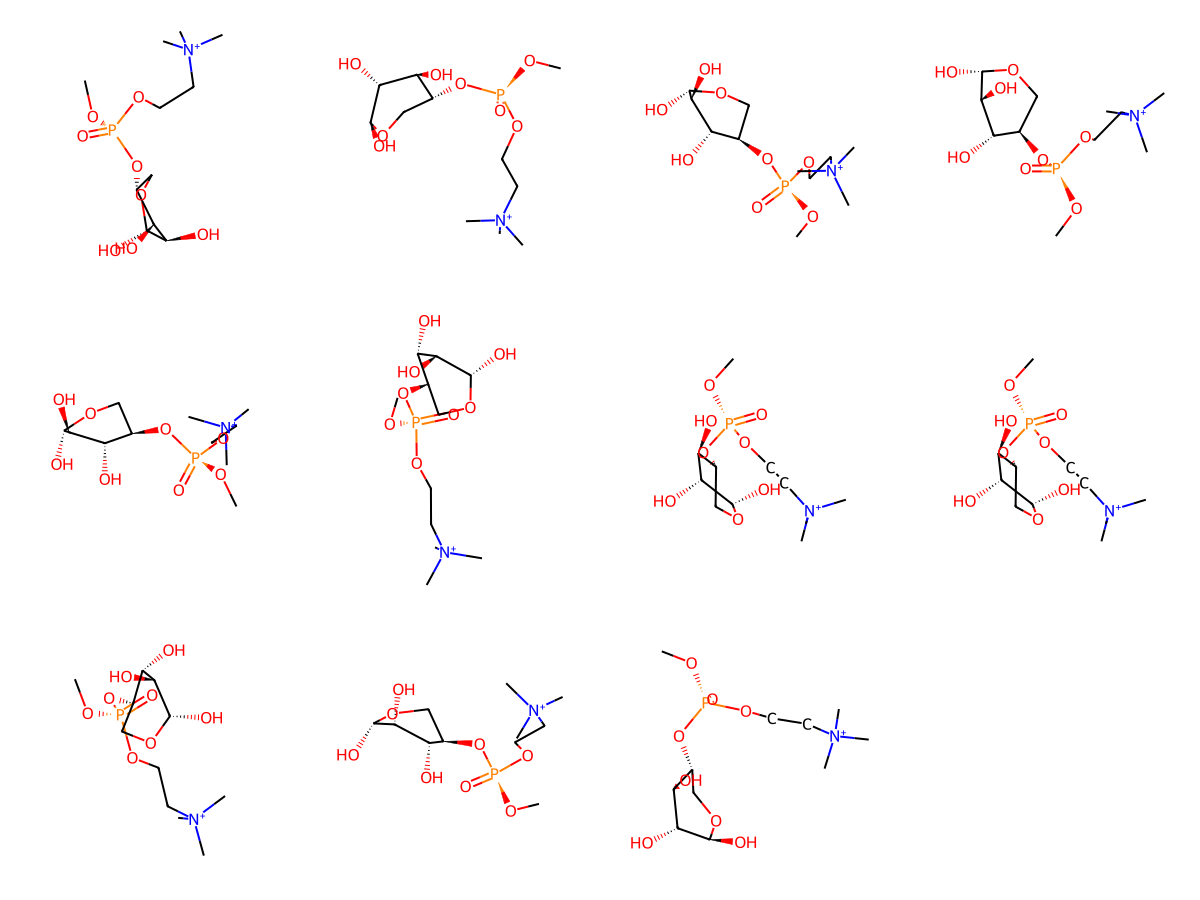

In [16]:
import os
from rdkit.Chem import Draw
mols = []

# List all SDF files in the current directory
sdf_files = [f for f in os.listdir() if f.endswith(".sdf")]
for sdf_file in sdf_files:
    supplier = Chem.SDMolSupplier(sdf_file)
    for mol in supplier:
        if mol is not None:
            mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300, 300))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.